# Projetos aplicados em Python

Nesse treinamento, você deverá implementar as classes dos jogos `DiceRolling` e `GuessingGame`. Ambas devem herdar da classe base `BaseGame`. 

In [1]:
import abc
import random
import matplotlib.pyplot as plt

class BaseGame(metaclass=abc.ABCMeta):
  
    @abc.abstractmethod
    def run(self):
        """"Main method to run the game."""
        pass
  
    @abc.abstractmethod
    def _input_check(self):
        """Check user input."""
        pass

## Dice Rolling

Like the title suggests, this project involves writing a program that simulates rolling dice. When the program runs, it will randomly choose a number between 1 and 6. (Or whatever other integer you prefer — the number of sides on the die is up to you.) The program will print what that number is. It should then ask you if you’d like to roll again. For this project, you’ll need to set the min and max number that your dice can produce. For the average die, that means a minimum of 1 and a maximum of 6. You’ll also want a function that randomly grabs a number within that range and prints it.

In [28]:
class DiceRolling(BaseGame):
    """Rolling a dice."""
    
    REROLL = 1
    STOP = 0
    BAD_INPUT = -1
    MAX = 12
    MIN = 1
    
    def run(self):
        """"Main method to run the game."""
        
        while True:
            choice = input('Roll dice? (y/n): ')
            action = self._input_check(choice)
            
            if action == DiceRolling.REROLL:
                print(f'You got {self._random_number()}')
            
            elif action == DiceRolling.STOP:
                return 0
            
            else:
                print("You must type 'y' or 'n'! Try again...")        


    def _input_check(self, choice):
        """Check user input."""
        if choice == 'y':
            return DiceRolling.REROLL
        
        elif choice == 'n':
            return DiceRolling.STOP
        
        else:
            return DiceRolling.BAD_INPUT    

    
    def _random_number(self):
        return random.randint(DiceRolling.MIN, DiceRolling.MAX)

In [29]:
dice_rolling = DiceRolling()
dice_rolling.run()

Roll dice? (y/n): y
You got 1
Roll dice? (y/n): h
You must type 'y' or 'n'! Try again...
Roll dice? (y/n): 1
You must type 'y' or 'n'! Try again...
Roll dice? (y/n): y
You got 7
Roll dice? (y/n): y
You got 1
Roll dice? (y/n): y
You got 2
Roll dice? (y/n): n


0

## Guessing Game

The program will first randomly generate a number unknown to the user. The user needs to guess what that number is. (In other words, the user needs to be able to input information.) If the user’s guess is wrong, the program should return some sort of indication as to how wrong (e.g. The number is too high or too low). If the user guesses correctly, a positive indication should appear. You’ll need functions to check if the user input is an actual number, to see the difference between the inputted number and the randomly generated numbers, and to then compare the numbers.

In [4]:
class GuessingGame(BaseGame):
    """Guess a number between 1 and 99."""
    
    VALID_INPUT = 1
    BAD_INPUT = 0
    LOW = 0
    HIGH = 1
    EQUAL = -1
    

    def __init__(self):
        self.__true_value = random.randint(1, 99)
        self.__guesses = []

    def run(self):
        """"Main method to run the game."""
        
        while True:
            choice = int(input('Enter an integer from 1 to 99: '))
            action = self._input_check(choice)
            
            if action == GuessingGame.VALID_INPUT:
                self.__guesses.append(choice)
                guess = self._input_compare(choice)
                
                if guess == GuessingGame.LOW:
                    print('Your guess is low!')
                
                elif guess == GuessingGame.HIGH:
                    print('Your guess is high!')
              
                else:
                    print('You guessed it!')
                    self._plot_guesses()
                    break
                    
            
            elif action == GuessingGame.BAD_INPUT:
                print('Your guess must be within 1 and 99! Try again...')
                
    
    def _input_check(self, choice):
        """Check user input."""
        if choice >= 1 and choice <= 99:
            return GuessingGame.VALID_INPUT
        
        return GuessingGame.BAD_INPUT


    def _input_compare(self, choice):
        """Compares user input to true value."""
        if choice > self.__true_value:
            return GuessingGame.HIGH
        
        elif choice < self.__true_value:
            return GuessingGame.LOW
        
        else:
            return GuessingGame.EQUAL
        
    def _plot_guesses(self):
        """Plot guesses and the true value."""

        plt.figure()
        plt.style.use('ggplot')
        plt.xlabel('Attempts')
        plt.plot(self.__guesses, label='guesses', linestyle='-', marker='o', color='#4c72b0')
        plt.axhline(y=self.__true_value, color='g', linestyle='-', label='true value')
        plt.legend()
        plt.show()

Enter an integer from 1 to 99: 50
Your guess is high!
Enter an integer from 1 to 99: 25
Your guess is low!
Enter an integer from 1 to 99: 30
Your guess is low!
Enter an integer from 1 to 99: 45
Your guess is high!
Enter an integer from 1 to 99: 40
Your guess is high!
Enter an integer from 1 to 99: 38
Your guess is high!
Enter an integer from 1 to 99: 36
You guessed it!


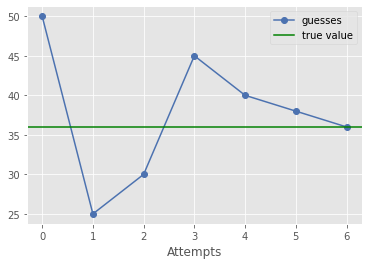

In [5]:
guessing_game = GuessingGame()
guessing_game.run()